# <span style="color:#bce35b">Probability Distribution Functions</span>

Import modules

In [262]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pydataset import data
import seaborn as sns
import statistics
from scipy.stats import norm
from scipy import stats

<br>

Create dataframe for analysis

<br>

## <span style="color:#ae8bd5">Probability Mass Function (PMF)</span>

- Instead of frequency like a histogram shows, a Probability Mass Function will output the probability for each value.
- Not good for distributions with a lot of distinct values. Will produce a lot of noise.
- Sum of all probabilities must equal 1

$f(x)=\left\{\begin{matrix}\frac{1}{b-a}
 & a<= x <= b \\ 0
 & otherwise
\end{matrix}\right.$

<br>

## <span style="color:#ae8bd5">Cumulative Distribution Function (CDF)</span>

- The probability that x will have a value less than (or equal depending on who you ask) x.
- Every CDF is non-decreasing while iterating over x. This is because the probability for x is accumulated from previous values.
- The entire function must be equal to 1.
- The function ranges from 0 to 1.

$FX(x)=P(X\leq x)$

<br> 

## <span style="color:#ae8bd5">Probability Density Function</span>

<br>

## <span style="color:#ae8bd5">Kernel Density Function</span>

## <span style="color:#ae8bd5">Different Distributions</span>


### Uniform Distribution

#### <span style="color:gray">Probability Mass Function (PMF)</span>

For discrete variables with not so many values, we can use a PMF function which maps the value to it's probability (aka %).

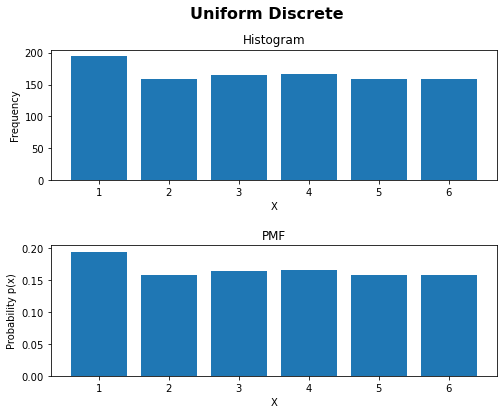

In [24]:
n = 1000

# set seed for random data
rng = np.random.default_rng(seed=777)

# from seed object, create discrete uniform distribution
uniform_disc = rng.integers(low=1, high=7, size=n)

# from uniform array, get unique value array and counts array
val, cnt = np.unique(uniform_disc, return_counts=True)

# from counts array, calculate the probability mass function (PMF)
prob = cnt/len(uniform_disc)

# plot the histogram and pmf graph
fig, axs = plt.subplots(nrows=2, figsize=(8,6))
plt.subplots_adjust(hspace=.5)  # adjust row space between graphs

axs[0].set_title('Histogram')
axs[0].bar(val, cnt)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Frequency')

axs[1].set_title('PMF')
axs[1].bar(val, prob)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Probability p(x)')

plt.suptitle('Uniform Discrete', size=16, weight='bold')
plt.show()


<br>

<u>Uniform Continuous</u>

Below, as you can see, PMF does not work well when the variable is not discrete and has many values. The more values there are, the more noise is produced. For this type of data a Cumulative Distribution Function (CDF) or Probability Density Function (PDF) would be a better function for the data.

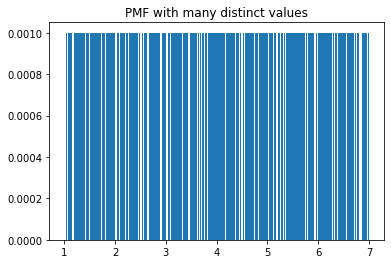

In [18]:
n = 1000

rng = np.random.default_rng(seed=777)

uniform_cont = rng.uniform(low=1, high=7, size=n)

val, cnt = np.unique(uniform_cont, return_counts=True)

prob = cnt/len(uniform_cont)

plt.bar(val, prob, width=.01)
plt.title('PMF with many distinct values')
plt.show()

<br>

#### <span style="color:gray">Cumulative Distribution Function (CDF)</span>

As the name suggests, we'll be adding up probabilities up to a certain value. 
- One way to think of it like percentiles. We're basically evaluating how many values that are less than or equal to the value in question divided by the total number of values. 
- Taking the derivative of $FX(x)$ = Probabiity Density Function (PDF)

<br>

$FX(x)=P(X\leq x)$



<br>

<u>Uniform Discrete</u>

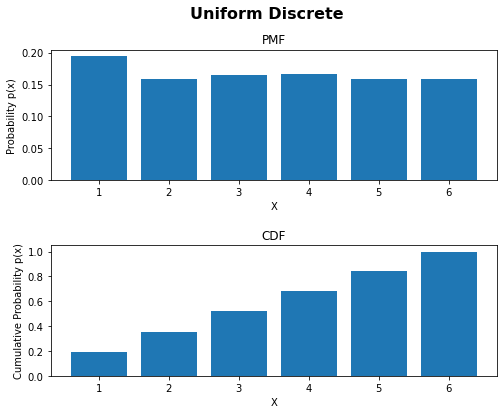

In [166]:
n = 1000

# set seed for random data
rng = np.random.default_rng(seed=777)

# from seed object, create discrete uniform distribution
uniform_disc = rng.integers(low=1, high=7, size=n)
uniform_disc.sort()

# from uniform array, get unique value array and counts array
x, cnt = np.unique(uniform_disc, return_counts=True)

# from counts array, calculate the probability mass function (PMF)
prob = cnt/len(uniform_disc)

# from values, create CDF
sample_size = len(uniform_disc)
cdf_dict = {}
for count, val in enumerate(uniform_disc, start=1):
    cdf_dict[val] = count/sample_size
    
cdf_x, cumulative_prob = zip(*cdf_dict.items())

# plot the pmf and cdf graph
fig, axs = plt.subplots(nrows=2, figsize=(8,6))
plt.subplots_adjust(hspace=.5)  # adjust row space between graphs

axs[0].set_title('PMF')
axs[0].bar(x, prob)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Probability p(x)')

axs[1].set_title('CDF')
axs[1].bar(cdf_x, cumulative_prob)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Cumulative Probability p(x)')

plt.suptitle('Uniform Discrete', size=16, weight='bold')
plt.show()

Text(0, 0.5, 'Cumalitive Probability (CDF)')

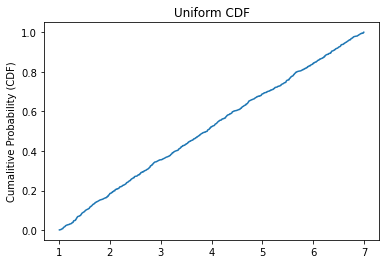

In [167]:
n = 1000

rng = np.random.default_rng(seed=777)

uniform_cont = rng.uniform(low=1, high=7, size=n)

sample_size = len(uniform_cont)

uniform_cont.sort()

cdf_dict = {}

for count, val in enumerate(uniform_cont, start=1):
    cdf_dict[val] = count/sample_size
    
cdf_x, cdf = zip(*cdf_dict.items())

plt.plot(cdf_x, cdf)
plt.title('Uniform CDF')
plt.ylabel('Cumalitive Probability (CDF)')

<br>

#### <span style="color:gray">Probability Density Function (PDF)</span>

The probability density function show the rate of changes for a Cumulative Distribution Function (CDF). So getting the derivative of the CDF at each value of x will give you the PDF. 

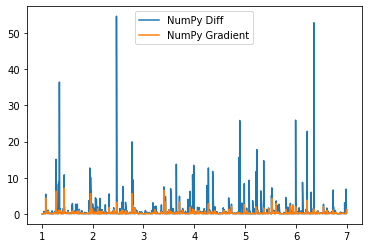

In [260]:
n = 1000

rng = np.random.default_rng(seed=777)

uniform_cont = rng.uniform(low=1, high=7, size=n)

sample_size = len(uniform_cont)

uniform_cont.sort()

cdf_dict = {}

for count, val in enumerate(uniform_cont, start=1):
    cdf_dict[val] = count/sample_size
    
x, cdf = zip(*cdf_dict.items())

## using np.diff, get PDF
dx = np.diff(x, prepend=0)
dy = np.diff(cdf, prepend=0)
pdf = dy/dx

## using np.gradient, get PDF
dx2 = np.gradient(x)
dy2 = np.gradient(cdf)
pdf2 = dy2/dx2

plt.plot(x, pdf, label='NumPy Diff')
plt.plot(x, pdf2, label='NumPy Gradient')
plt.legend()

In [ ]:
n = 1000
mean = 0
std = 1

rng = np.random.default_rng(seed=777)  # set seed to get reproducable work

uniform_cont = rng.uniform(low=1, high=7, size=n)

normal_disc.sort()  # sort normal distribution

normal_disc_dict = {}  # instantiate dictionary


## loop through sorted distribution to get CDF
for i, val in enumerate(normal_disc, start=1):
    normal_disc_dict[val] = i/len(normal_disc)
    

## pull x values and CDF from dictionary
x, cdf = zip(*normal_disc_dict.items())

## using np.diff
dx = np.diff(x, prepend=0)
dy = np.diff(cdf, prepend=0)

## using np.gradient
dx2 = np.gradient(x)
dy2 = np.gradient(cdf)

## plotting results
plt.plot(x, dy/dx)
plt.plot(x, dy2/dx2)

<br>

### Normal Distribution

<br>

#### <span style="color:gray">Probability Mass Function (PMF)</span>

<u>Normal Discrete</u>

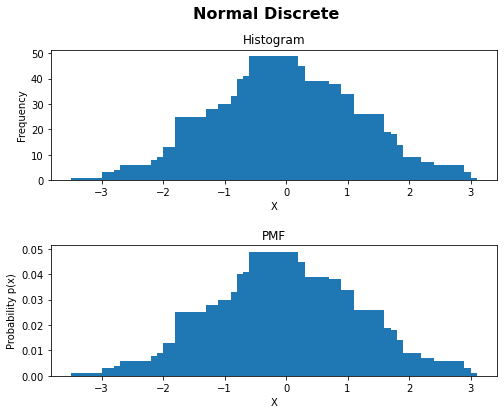

In [141]:
n = 1000
mean = 0
std = 1

rng = np.random.default_rng(seed=777)

normal_disc = rng.normal(loc=mean, scale=std, size=n)

normal_disc = np.around(normal_disc, 1)

# from normal array, get unique value array and counts array
val, cnt = np.unique(normal_disc, return_counts=True)

# from counts array, calculate the probability mass function (PMF)
prob = cnt/len(uniform_disc)

# plot the histogram and pmf graph
fig, axs = plt.subplots(nrows=2, figsize=(8,6))
plt.subplots_adjust(hspace=.5)  # adjust row space between graphs

axs[0].set_title('Histogram')
axs[0].bar(val, cnt)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Frequency')

axs[1].set_title('PMF')
axs[1].bar(val, prob)
axs[1].set_xlabel('X')
axs[1].set_ylabel('Probability p(x)')

plt.suptitle('Normal Discrete', size=16, weight='bold')
plt.show()

<br>

#### <span style="color:gray">Cumulative Distribution Function (CDF)</span>

Text(0, 0.5, 'Cumulative Probability')

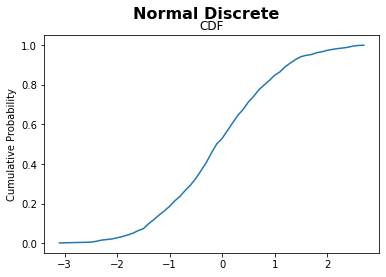

In [290]:
n = 1000
mean = 0
std = 1

rng = np.random.default_rng(seed=777)  # set seed to get reproducable work

normal_disc = rng.normal(loc=mean, scale=std, size=n)  # get normal sample

normal_disc = np.around(normal_disc, 1)  # round to get discrete values

normal_disc.sort()  # sort normal distribution

normal_disc_dict = {}  # instantiate dictionary


## loop through sorted distribution to get CDF
for i, val in enumerate(normal_disc, start=1):
    normal_disc_dict[val] = i/len(normal_disc)
    

## pull x values and CDF from dictionary
x, cdf = zip(*normal_disc_dict.items())

## plot the results
plt.plot(x, cdf)
plt.suptitle('Normal Discrete', size=16, weight='bold')
plt.title('CDF')
plt.ylabel('Cumulative Probability')

<br>

#### <span style="color:gray">Kernel Density Estimation (KDE)</span>

AttributeError: 'Rectangle' object has no property 'fit'

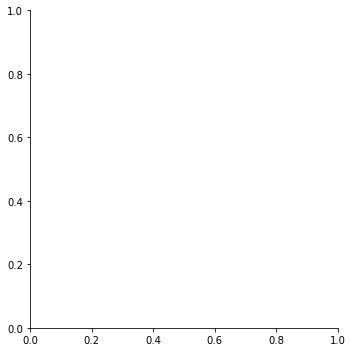

In [319]:
n = 1000
mean = 0
std = 1

rng = np.random.default_rng(seed=777)  # set seed to get reproducable work

normal_cont = rng.normal(loc=mean, scale=std, size=n)  # get normal sample

normal_cont.sort()  # sort normal distribution

normal_cont_dict = {}  # instantiate dictionary


## loop through sorted distribution to get CDF
for i, val in enumerate(normal_cont, start=1):
    normal_cont_dict[val] = i/len(normal_cont)
    

## pull x values and CDF from dictionary
x, cdf = zip(*normal_cont_dict.items())


## plotting estimated PDF using Kernel Density Function
sns.displot(x, kde=True)
